In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
#Importing The Dataset
df = pd.read_csv('TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
#Checking The Shape Of The Dataset
df.shape

(2416, 7)

In [4]:
#Checking The Null Values
df.isnull().sum().any()

False

In [5]:
#Columns In The Dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [8]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999425  0.999575  0.998886   0.998886  0.501762
High       0.999425  1.000000  0.999389  0.999640   0.999640  0.512944
Low        0.999575  0.999389  1.000000  0.999447   0.999447  0.493496
Close      0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Adj Close  0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Volume     0.501762  0.512944  0.493496  0.505169   0.505169  1.000000


<ipython-input-8-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-9-39fcd92b18e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues', annot=True)


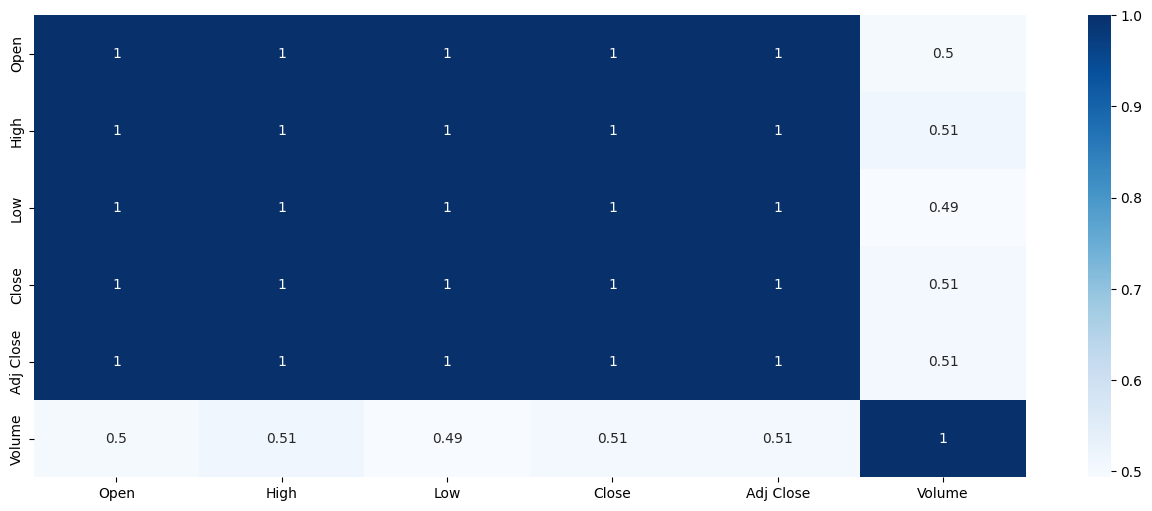

In [9]:
#Corelation Between The Coulumns
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.show()

<Axes: ylabel='Low'>

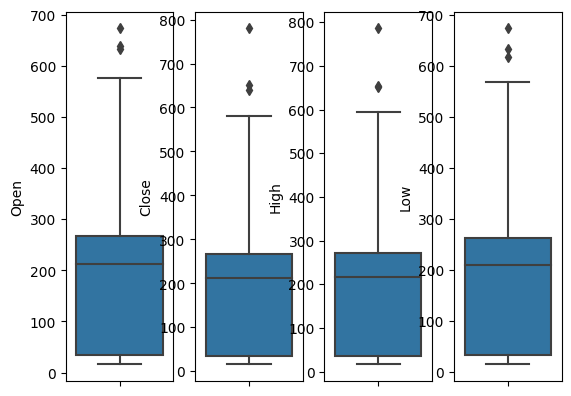

In [10]:
#Checking the Outliers
f, axes = plt.subplots(1,4)
sns.boxplot(y='Open', data=df, ax=axes[0])
sns.boxplot(y='Close', data=df, ax=axes[1])
sns.boxplot(y='High', data=df, ax=axes[2])
sns.boxplot(y='Low', data=df, ax=axes[3])

In [11]:
#Plotting The Graph Of The Dataset
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                       open=df['Open'],high=df['High'],
                                       low=df['Low'], close=df["Close"])])
figure.update_layout(title='Tesla Stock Price Analysis', xaxis_rangeslider_visible=False)

##Split The Dataset

In [12]:
X = df[['Open','High','Low','Volume']].values
y = df["Close"].values

Split the data 80% and 20% testing

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
print('Train',X_train.shape)
print('Test',X_test.shape)

Train (1932, 4)
Test (484, 4)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

regressor = LinearRegression()
model=regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [16]:
predicted = regressor.predict(X_test)
print(predicted)

[211.93327382  28.34344645  23.96747049 326.63889044 197.99951124
 209.84143145  26.57054023  24.1159654  218.55046473 350.59944847
 216.7099975  280.40049957  31.69697966 102.55542125  20.40022644
 349.79891149 103.437858   258.02993844  27.72811815 223.91076239
 363.87876094 325.90560673 221.70942778 341.85450842 306.21971732
 180.6830296  336.4653148  271.66139389 226.68781494 244.90669049
  26.54390032  31.41751114  30.63028454 227.98926241 392.95272138
 222.78373695 214.4718434  137.93700922 325.22897451 219.93566688
 309.22196141  36.64959179  23.07174593 214.02967116  28.19760332
 231.64875996 197.4321599   34.04842541 308.29253631 272.83813857
 231.79550035 298.31285403  35.44684051 217.34268703 289.79617795
 232.2691816   34.16691676 237.48107308  18.0454679   52.30063598
 227.67194808  34.09896992 260.47309803 323.43699347  27.15820053
  28.02553518 247.17197818 228.41047918  20.83224441  33.0548958
  33.16853853 170.80777717 323.4398143   23.69198075  33.1451879
 299.2182163

In [17]:
predicted.shape

(484,)

In [18]:
#Actual Price VS Predicted Price
dframe = pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":predicted})
print(dfr)

     Actual_Price  Predicted_price
0      207.729996       211.933274
1       28.280001        28.343446
2       24.010000        23.967470
3      315.230011       326.638890
4      200.240005       197.999511
..            ...              ...
479    188.020004       190.223111
480    351.920013       355.507207
481     27.250000        26.714820
482    185.850006       184.058034
483     31.820000        31.477192

[484 rows x 2 columns]


Stats for Predicted

In [19]:
dfr.head(20)

,Actual_Price,Predicted_price
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [20]:
import scipy.stats

p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is :' + str(p_value))

p value is :0.04745968180294733


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
regression_confidence = regressor.score(X_test,y_test)
print("Linear Regression Confidence", regression_confidence)

Linear Regression Confidence 0.9996956321109922


In [22]:
x2= abs(predicted-y_test)
y2= 100*(x2/ y_test)
accuracy = 100-np.mean(y2)
print("Accuracy:", round(accuracy, 2), '%')

Accuracy: 99.12 %


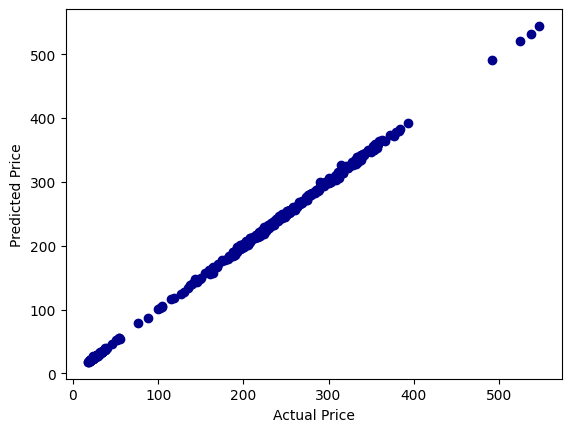

In [23]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_price, color="Darkblue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

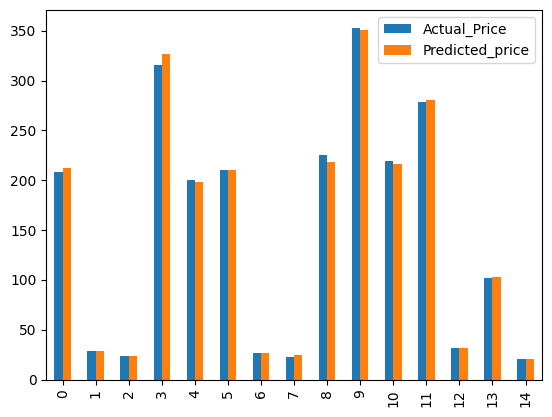

In [24]:
#Plotting the First 15 Predicted and Actual Price
graph = dfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
     Actual_Price  Predicted_price
0      207.729996       208.650998
1       28.280001        28.380000
2       24.010000        24.084000
3      315.230011       318.987003
4      200.240005       199.277005
..            ...              ...
479    188.020004       188.815002
480    351.920013       354.109005
481     27.250000        26.964000
482    185.850006       185.718001
483     31.820000        31.660000

[484 rows x 2 columns]
---------------------------------------------------------------------
Random Forest Regression Confidence 0.9998944171787092
---------------------------------------------------------------------
Accuracy: 99.56 %
---------------------------------------------------------------------


<Axes: >

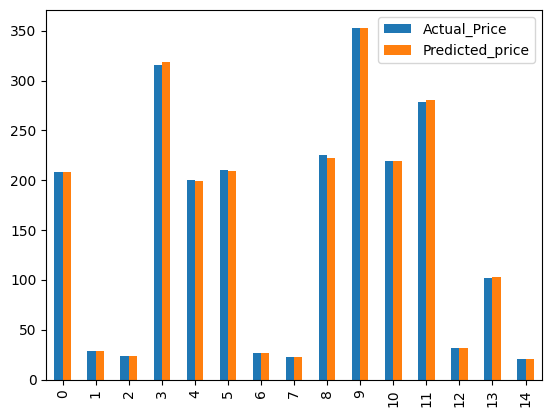

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr_regressor.fit(X, y)
rfr_predicted = rfr_regressor.predict(X_test)
#print(rfr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
drframe = pd.DataFrame(y_test,rfr_predicted)
drfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":rfr_predicted})
print(drfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
rfr_regression_confidence = rfr_regressor.score(X_test,y_test)
print("Random Forest Regression Confidence", rfr_regression_confidence)
print("---------------------------------------------------------------------")
x4= abs(rfr_predicted-y_test)
y4= 100*(x4/ y_test)
rfr_accuracy = 100-np.mean(y4)
print("Accuracy:", round(rfr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = drfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
     Actual_Price  Predicted_price
0      207.729996       207.729996
1       28.280001        28.280001
2       24.010000        24.010000
3      315.230011       315.230011
4      200.240005       200.240005
..            ...              ...
479    188.020004       188.020004
480    351.920013       351.920013
481     27.250000        27.250000
482    185.850006       185.850006
483     31.820000        31.820000

[484 rows x 2 columns]
---------------------------------------------------------------------
Decision Tree Regression Confidence 1.0
---------------------------------------------------------------------
Accuracy: 100.0 %
---------------------------------------------------------------------


<Axes: >

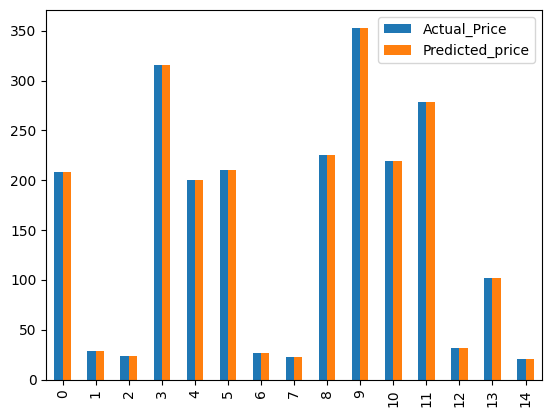

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr_regressor = DecisionTreeRegressor(random_state = 0)
dtr_regressor.fit(X, y)
dtr_predicted = dtr_regressor.predict(X_test)
#print(dtr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
dtframe = pd.DataFrame(y_test,dtr_predicted)
dtfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":dtr_predicted})
print(dtfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
dtr_regression_confidence = dtr_regressor.score(X_test,y_test)
print("Decision Tree Regression Confidence", dtr_regression_confidence)
print("---------------------------------------------------------------------")
x3= abs(dtr_predicted-y_test)
y3= 100*(x3/ y_test)
dtr_accuracy = 100-np.mean(y3)
print("Accuracy:", round(dtr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = dtfr.head(15)
graph.plot(kind='bar')

---------------------------------------------------------------------
     Actual_Price  Predicted_price
0      207.729996       234.175018
1       28.280001        52.767503
2       24.010000        48.866757
3      315.230011       250.841649
4      200.240005       113.147975
..            ...              ...
479    188.020004       192.672727
480    351.920013       221.392363
481     27.250000        42.930829
482    185.850006       155.187305
483     31.820000        34.600757

[484 rows x 2 columns]
---------------------------------------------------------------------
Random Forest Regression Confidence 0.5049930415164205
---------------------------------------------------------------------
Accuracy: 35.13 %
---------------------------------------------------------------------


<Axes: >

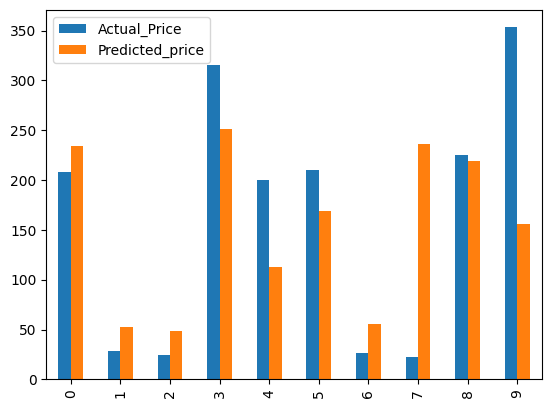

In [27]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, y)
svr_predicted = svr_regressor.predict(X_test)
#print(svr_predicted)
print("---------------------------------------------------------------------")
#Actual Price VS Predicted Price
dsframe = pd.DataFrame(y_test,svr_predicted)
dsfr=pd.DataFrame({'Actual_Price':y_test,"Predicted_price":svr_predicted})
print(dsfr)
print("---------------------------------------------------------------------")
from sklearn.metrics import confusion_matrix, accuracy_score
svr_regression_confidence = svr_regressor.score(X_test,y_test)
print("Random Forest Regression Confidence", svr_regression_confidence)
print("---------------------------------------------------------------------")
x5= abs(svr_predicted-y_test)
y5= 100*(x5/ y_test)
svr_accuracy = 100-np.mean(y5)
print("Accuracy:", round(svr_accuracy, 2), '%')
print("---------------------------------------------------------------------")
#Plotting the First 15 Predicted and Actual Price
graph = dsfr.head(10)
graph.plot(kind='bar')